# Setup

In [1]:
# Python 3 compatability
from __future__ import division, print_function

# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np
import math
from numpy import linalg
import scipy
from scipy import stats

# plotting
import matplotlib
from matplotlib import pyplot as plt

# fits data
from astropy.io import fits

# inline plotting
%matplotlib inline

In [2]:
# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 30})

# Galaxy

Grab data.

In [3]:
# fixed background

nruns, ntrials = 9, 100000
sigclip = 5.
galsize = np.sqrt(6)

# true values
f, ferr, ftrials = np.zeros((3, nruns))

# extract data
flux, fluxerr, x, y = np.zeros((4, nruns, ntrials))
for i in range(nruns):
    fname = 'data/galx_fix/run{0}.fits'.format(i)  # run
    if os.path.isfile(fname):
        hdul = fits.open(fname)
        # grab true values
        f[i] = hdul[0].header['TRUEFLUX']  # true flux
        psfwidth = hdul[0].header['PSFWIDTH']  # Gaussian PSF width
        noise = hdul[0].header['NOISE']  # iid Gaussian noise
        aeff = 4. * np.pi * (psfwidth**2 + galsize**2)  # effective area
        ferr[i] = np.sqrt(aeff * noise**2)  # true error
        # grab trials
        data = hdul[1].data
        flux[i] = data['Flux']  # fluxes
        fluxerr[i] = data['Fluxerr']  # flux errors
        x[i], y[i] = data['X'], data['Y']  # positions
        # clip suspicious trials
        pos = np.c_[x[i], y[i]]
        cinv = np.linalg.inv(np.cov(pos, rowvar=False))  # inv-cov
        sqdist = np.array([np.dot(np.dot(p, cinv), p) 
                           for p in pos])  # normalized distance
        sel = (sqdist <= sigclip**2) & (flux[i] / fluxerr[i] > 0.2)  # clip outliers
        flux[i, ~sel], fluxerr[i, ~sel] = np.nan, np.nan
        x[i, ~sel], y[i, ~sel] = np.nan, np.nan
        ftrials[i] = len(sel)
    else:
        print(fname + ' not found.')

In [4]:
# variable background

nruns, nsizes, ntrials = 9, 5, 100000
sigclip = 5.
galsize = np.sqrt(6)

# true values
f2, ferr2, ftrials2, imgsize2 = np.zeros((4, nruns, nsizes))

# extract data
flux2, fluxerr2, x2, y2, b2 = np.zeros((5, nruns, nsizes, ntrials))
for i in range(nruns):
    for j in range(nsizes):
        fname = 'data/galx_flt/run{0}.fits'.format(i * nsizes + j)  # run
        if os.path.isfile(fname):
            hdul = fits.open(fname)
            # grab true values
            f2[i, j] = hdul[0].header['TRUEFLUX']  # true flux
            psfwidth = hdul[0].header['PSFWIDTH']  # Gaussian PSF width
            noise = hdul[0].header['NOISE']  # iid Gaussian noise
            aeff = 4. * np.pi * (psfwidth**2 + galsize**2)  # effective area
            imgsize2[i, j] = hdul[0].header['IMGSIZE']  # image area
            ferr2[i, j] = 1./np.sqrt(1./(aeff) - 1./(imgsize2[i, j]**2))  # true error
            # grab trials
            data = hdul[1].data
            flux2[i, j] = data['Flux']  # fluxes
            fluxerr2[i, j] = data['Fluxerr']  # flux errors
            x2[i, j], y2[i, j] = data['X'], data['Y']  # positions
            b2[i, j] = data['Back']
            # clip suspicious trials
            pos = np.c_[x2[i, j], y2[i, j]]
            cinv = np.linalg.inv(np.cov(pos, rowvar=False))  # inv-cov
            sqdist = np.array([np.dot(np.dot(p, cinv), p) 
                               for p in pos])  # normalized distance
            sel = (sqdist <= sigclip**2) & (flux2[i, j] / fluxerr2[i, j] > 0.2)  # clip outliers
            flux2[i, j, ~sel], fluxerr2[i, j, ~sel] = np.nan, np.nan
            x2[i, j, ~sel], y2[i, j, ~sel] = np.nan, np.nan
            b2[i, j, ~sel] = np.nan
            ftrials2[i, j] = len(sel)
        else:
            print(fname + ' not found.')

data/galx_flt/run2.fits not found.
data/galx_flt/run3.fits not found.
data/galx_flt/run4.fits not found.
data/galx_flt/run5.fits not found.
data/galx_flt/run9.fits not found.
data/galx_flt/run13.fits not found.
data/galx_flt/run14.fits not found.
data/galx_flt/run16.fits not found.
data/galx_flt/run18.fits not found.
data/galx_flt/run19.fits not found.
data/galx_flt/run22.fits not found.
data/galx_flt/run23.fits not found.
data/galx_flt/run24.fits not found.
data/galx_flt/run26.fits not found.
data/galx_flt/run27.fits not found.
data/galx_flt/run28.fits not found.
data/galx_flt/run29.fits not found.
data/galx_flt/run30.fits not found.
data/galx_flt/run32.fits not found.
data/galx_flt/run33.fits not found.
data/galx_flt/run34.fits not found.
data/galx_flt/run37.fits not found.
data/galx_flt/run38.fits not found.
data/galx_flt/run39.fits not found.
data/galx_flt/run41.fits not found.
data/galx_flt/run42.fits not found.
data/galx_flt/run43.fits not found.
data/galx_flt/run44.fits not foun

In [5]:
# define relevant quantities

snr = f / ferr  # true SNR
favg, fstd = np.nanmean(flux, axis=1), np.nanstd(flux, axis=1)
fbias_avg = (favg - f) / f  # fractional bias
fbias_err = fstd / f / np.sqrt(ftrials)  # uncertainty

snr2 = f2 / ferr2  # true SNR
favg2, fstd2 = np.nanmean(flux2, axis=2), np.nanstd(flux2, axis=2)
fbias_avg2 = (favg2 - f2) / f2  # fractional bias
fbias_err2 = fstd2 / f2 / np.sqrt(ftrials2)  # uncertainty

/home/joshspeagle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/joshspeagle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/joshspeagle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Plot flux bias.

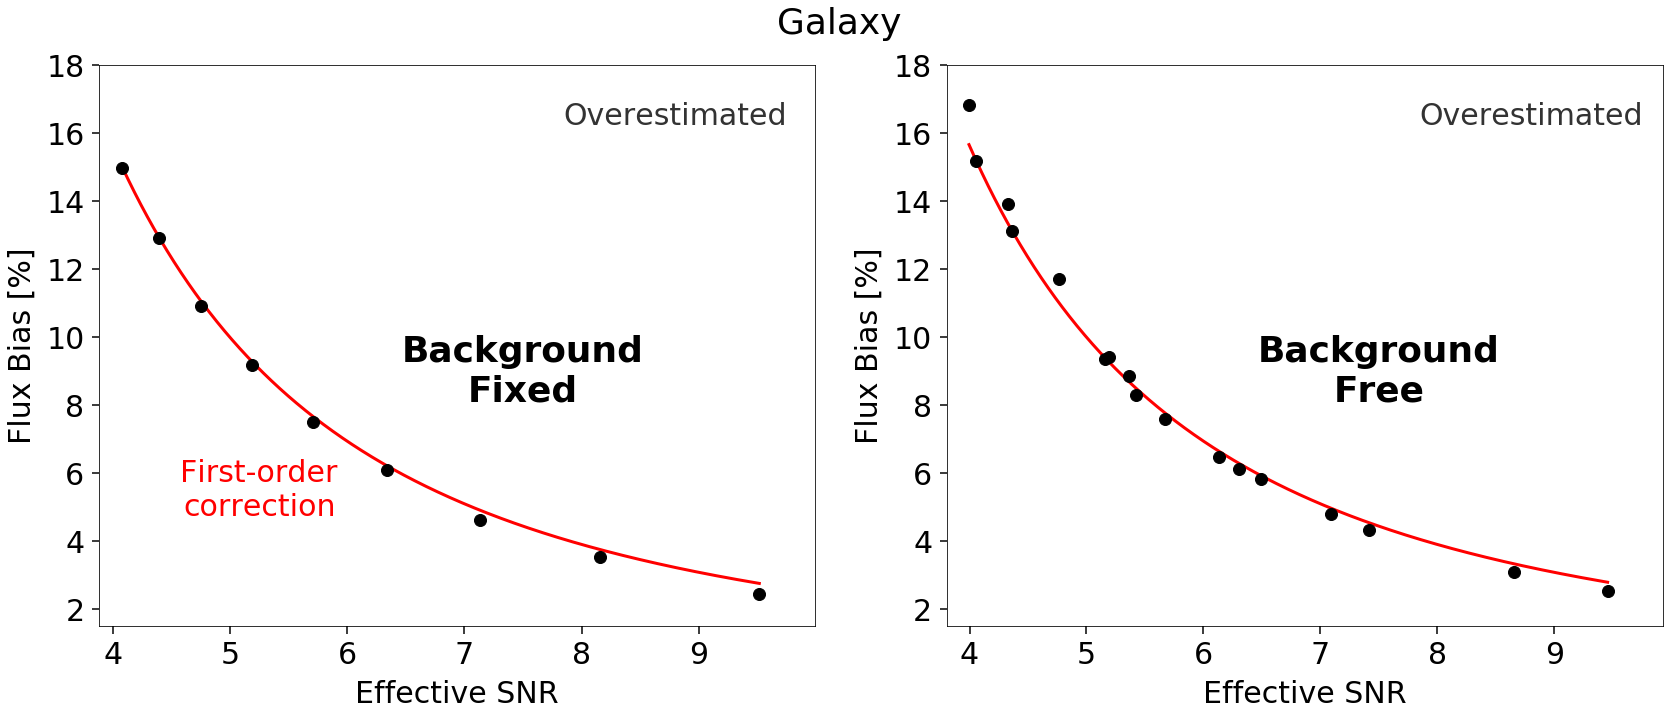

In [6]:
snr_grid = np.linspace(np.nanmin(snr), np.nanmax(snr), 1000)
snr2_grid = np.linspace(np.nanmin(snr2), np.nanmax(snr2), 1000)

# plot flux bias + variance
plt.figure(figsize=(24, 10))
plt.suptitle('Galaxy', y=1.02)

# flux (background fixed)
plt.subplot(1, 2, 1)
plt.errorbar(snr, fbias_avg * 100., yerr=fbias_err, marker='o', 
             color='black', linestyle='none', markersize=12,
             elinewidth=2)  # avg fractional bias
plt.plot(snr_grid, 5. / 2. * snr_grid**-2 * 100.,
         linestyle='-', color='red',
         label='1st-order', lw=3)  # 1st-order correction
# label lines
plt.text(5.25, 5.5, 'First-order\ncorrection', 
         horizontalalignment='center', verticalalignment='center',
         color='red')
# prettify
plt.text(8.8, 16.5, 'Overestimated',
         horizontalalignment='center', verticalalignment='center',
         color='black', alpha=0.8)
plt.text(7.5, 9., 'Background\nFixed', weight='bold', fontsize='large',
         horizontalalignment='center', verticalalignment='center',
         color='black')
plt.xlabel(r'Effective SNR', labelpad=10)
plt.ylabel(r'Flux Bias [%]', labelpad=10)
plt.xlim(np.nanmin(snr) / 1.05, np.nanmax(snr) * 1.05)
plt.ylim([1.5, 18])
plt.tight_layout()

# flux (background free)
plt.subplot(1, 2, 2)
plt.errorbar(snr2.flatten(), fbias_avg2.flatten() * 100., 
             yerr=fbias_err2.flatten(), marker='o', 
             color='black', linestyle='none', markersize=12,
             elinewidth=2)  # avg fractional bias
plt.plot(snr2_grid, 5. / 2. * snr2_grid**-2 * 100.,
         linestyle='-', color='red',
         label='1st-order', lw=3)  # 1st-order correction
# prettify
plt.text(8.8, 16.5, 'Overestimated',
         horizontalalignment='center', verticalalignment='center',
         color='black', alpha=0.8)
plt.text(7.5, 9., 'Background\nFree', weight='bold', fontsize='large',
         horizontalalignment='center', verticalalignment='center',
         color='black')
plt.xlabel(r'Effective SNR', labelpad=10)
plt.ylabel(r'Flux Bias [%]', labelpad=10)
plt.xlim(np.nanmin(snr2) / 1.05, np.nanmax(snr2) * 1.05)
plt.ylim([1.5, 18])
plt.tight_layout()

# save figure
plt.savefig('plots/gal.png', bbox_inches='tight')